In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [19]:
# Read CSV in variable data
data = pd.read_csv("fatalities.csv")

In [20]:
# Get first element of data
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,24/09/2023,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,24/09/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,24/09/2023,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,24/09/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,22/09/2023,16.0,Palestinian,Kfar Dan,Jenin,West Bank,22/09/2023,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,20/09/2023,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,20/09/2023,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,19/09/2023,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,19/09/2023,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [21]:
data['age'].fillna(data['age'].median(), inplace=True)
data['gender'].fillna(data['gender'].mode()[0],inplace=True)
data['place_of_residence'].fillna(data['place_of_residence'].mode()[0],inplace=True)
data['place_of_residence_district'].fillna(data['place_of_residence_district'].mode()[0], inplace=True)
data['citizenship'].fillna(data['citizenship'].mode()[0], inplace=True)
data['type_of_injury'].fillna('Unknown',inplace=True)
data['took_part_in_the_hostilities'].fillna(data['took_part_in_the_hostilities'].mode()[0], inplace=True)
data['ammunition'].fillna('Unknown',inplace=True)
data['notes'].fillna('',inplace=True)

data['date_of_death'] = data['date_of_death'].astype('datetime64[ns]')
data['age'] = data['age'].astype(int)
data['gender'] = data['gender'].astype(str)
data['place_of_residence'] = data['place_of_residence'].astype(str)
data['place_of_residence_district'] = data['place_of_residence_district'].astype(str)
data['type_of_injury'] = data['type_of_injury'].astype(str)
data['took_part_in_the_hostilities'] = data['took_part_in_the_hostilities'].astype(str)
data['ammunition'] = data['ammunition'].astype(str)
data['notes'] = data['notes'].astype(str)

C:\Users\SHAHZAIB\AppData\Local\Temp\ipykernel_4636\157758758.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_of_death'] = data['date_of_death'].astype('datetime64[ns]')


In [22]:
# Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11124 non-null  object        
 1   date_of_event                 11124 non-null  object        
 2   age                           11124 non-null  int32         
 3   citizenship                   11124 non-null  object        
 4   event_location                11124 non-null  object        
 5   event_location_district       11124 non-null  object        
 6   event_location_region         11124 non-null  object        
 7   date_of_death                 11124 non-null  datetime64[ns]
 8   gender                        11124 non-null  object        
 9   took_part_in_the_hostilities  11124 non-null  object        
 10  place_of_residence            11124 non-null  object        
 11  place_of_residence_district 

# Get description of data and some important statistical measures


In [23]:

data.describe()

,age,date_of_death
count,11124.000000,11124
mean,26.702265,2009-11-03 00:32:06.213592320
min,1.000000,2000-10-02 00:00:00
25%,19.000000,2004-05-18 00:00:00
50%,23.000000,2008-12-29 00:00:00
75%,31.000000,2014-07-26 00:00:00
max,112.000000,2023-09-24 00:00:00
std,13.706272,NaN


# Check how many null values avilable in data in each column

In [24]:

data.isna().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

#Q-1

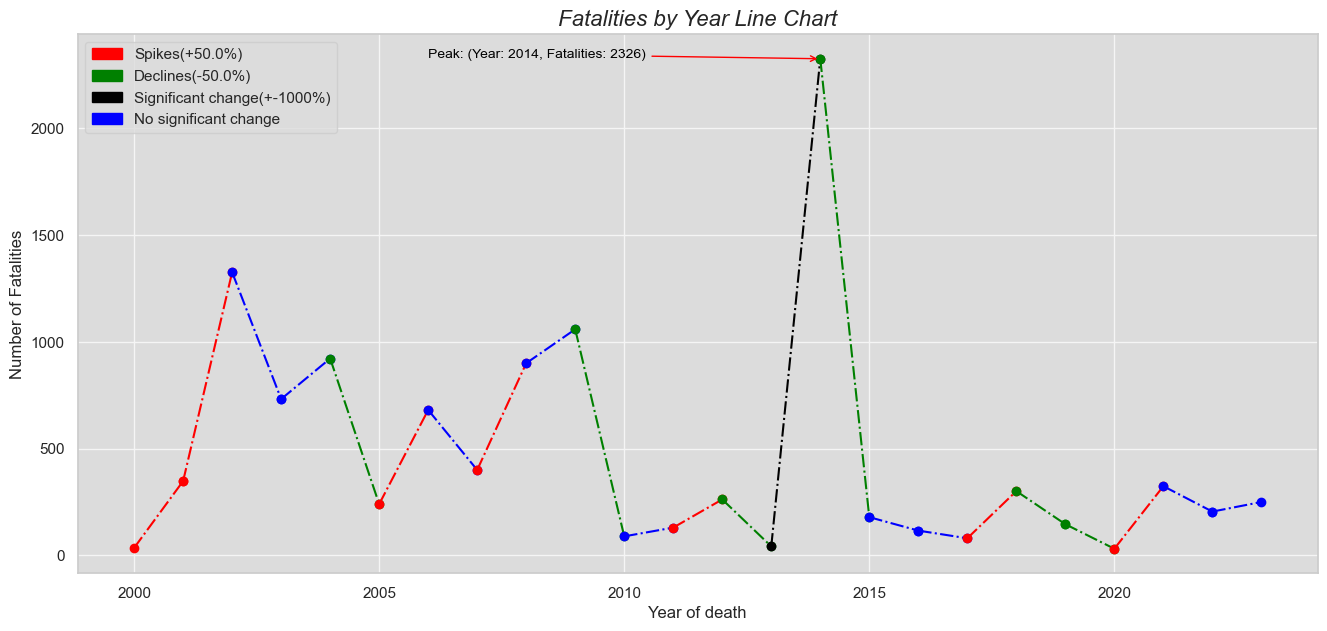

In [25]:

# Color palette
sns.set(style="whitegrid", palette='pastel')
sns.set_style("whitegrid", {"axes.facecolor": "#dcdcdc", "grid.color": "#f5f5f5"})

# Get counts of deaths based on year and find percentage change of current and previous data points
fatalities_count_by_year = data["date_of_death"].dt.year.value_counts().sort_index()
percentage_change_based_on_previous = fatalities_count_by_year.pct_change()

# Threshhold variables and array for graph lines and colours
spike_threshhold = 0.5
decline_threshhold = -0.5
significant_change_threshhold_spike = 10
significant_change_threshhold_decline = -significant_change_threshhold_spike
lines_and_its_colours = []

# Add lines and their colours in array based on threshhold
for i in range(1, len(percentage_change_based_on_previous)):
    if percentage_change_based_on_previous.iloc[i] >= significant_change_threshhold_spike or percentage_change_based_on_previous.iloc[i] <= significant_change_threshhold_decline:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'black'))
    elif percentage_change_based_on_previous.iloc[i] >= spike_threshhold:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'red'))
    elif percentage_change_based_on_previous.iloc[i] <= decline_threshhold:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'green'))
    else:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'blue'))

# Change figure size and add lines to graph
plt.figure(figsize=(16, 7))
for i in range(0, len(lines_and_its_colours)):
    line_start_year, line_color = lines_and_its_colours[i]
    line_end_year = line_start_year + 1
    start_value, end_value = fatalities_count_by_year.loc[line_start_year], fatalities_count_by_year.iloc[i + 1]
    plt.plot([line_start_year, line_end_year], [start_value, end_value], color=line_color, marker='o', linestyle='-.')

# Get the peak point and add arrow to it. Add labels and titles
peak_y = fatalities_count_by_year.values[np.argmax(fatalities_count_by_year.values)]
peak_x = fatalities_count_by_year.index[np.argmax(fatalities_count_by_year.values)]

plt.annotate(f'Peak: (Year: {peak_x}, Fatalities: {peak_y})', xy=(peak_x, peak_y), xytext=(peak_x - 8, peak_y + 5),
              arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='black')

plt.xlabel('Year of death', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.title('Fatalities by Year Line Chart', fontsize=16, fontstyle='italic')

# Add grid lines to graph and also patches to the legend and then show the graph
plt.grid(True)
redPatch = mpatches.Patch(color='red', label=f'Spikes(+{spike_threshhold * 100}%)')
greenPatch = mpatches.Patch(color='green', label=f'Declines({decline_threshhold * 100}%)')
blackPatch = mpatches.Patch(color='black', label=f'Significant change(+-{significant_change_threshhold_spike * 100}%)')
bluePatch = mpatches.Patch(color='blue', label='No significant change')
plt.legend(handles=[redPatch, greenPatch, blackPatch, bluePatch], loc='upper left')
plt.show()

#Q-2
# Get count of deaths based on age of victim


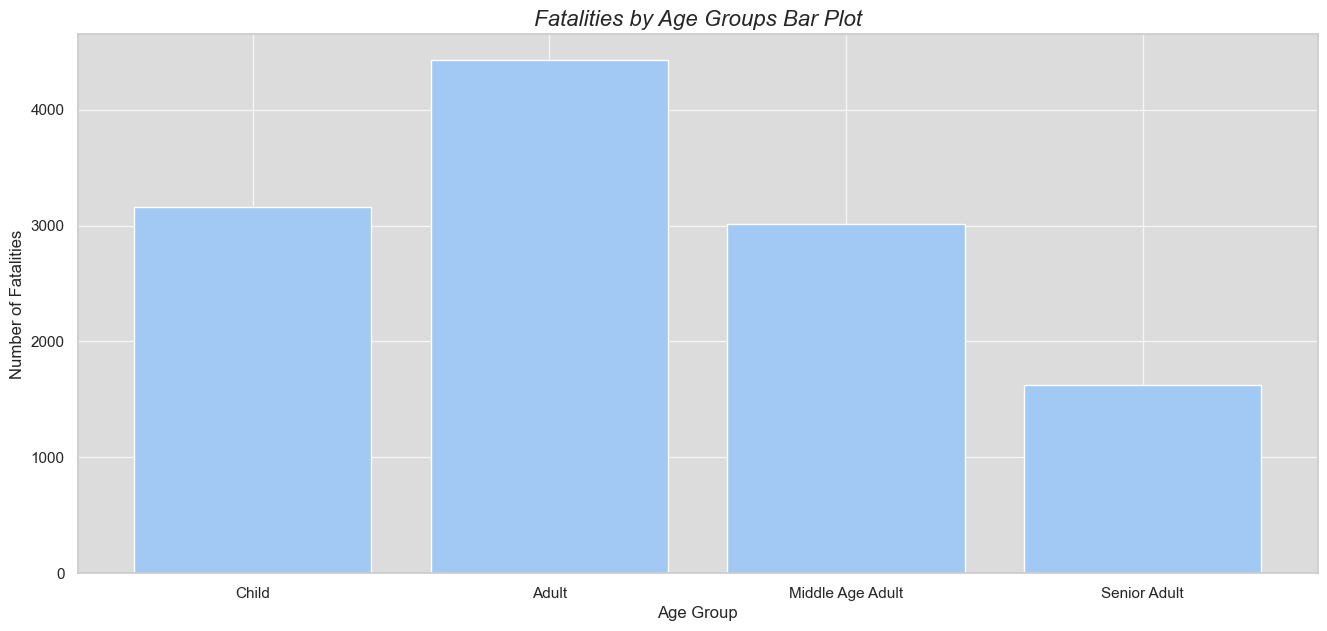

<Figure size 640x480 with 0 Axes>

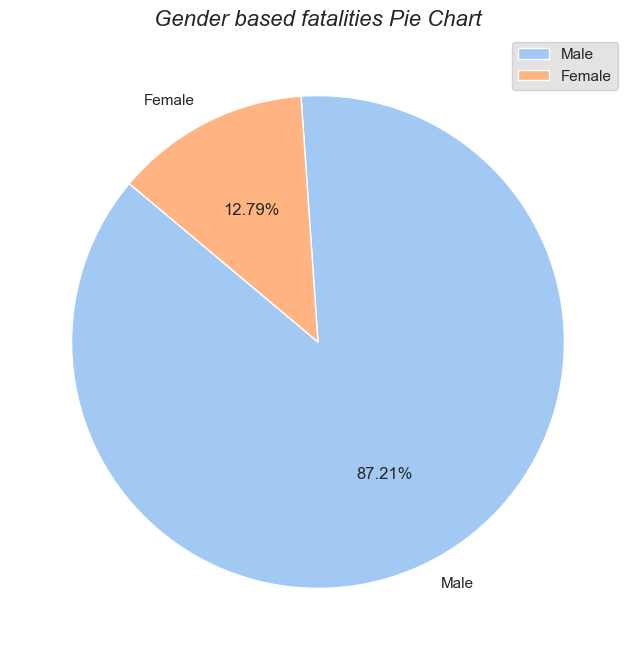

<Figure size 640x480 with 0 Axes>

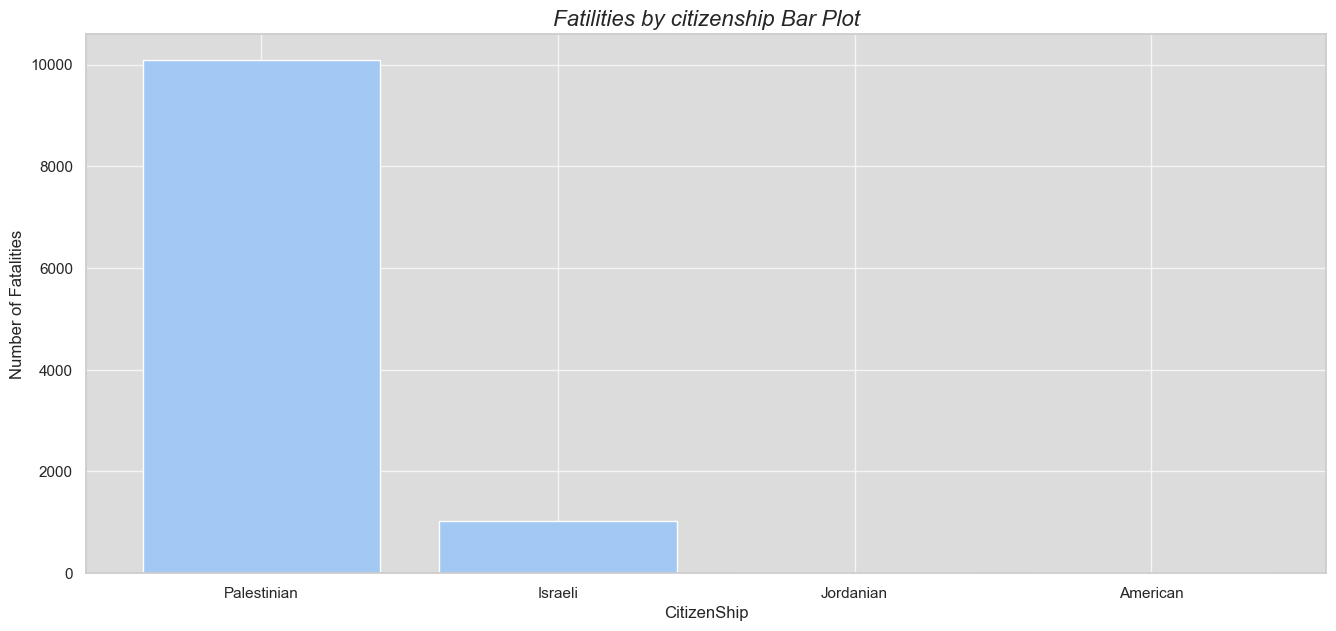

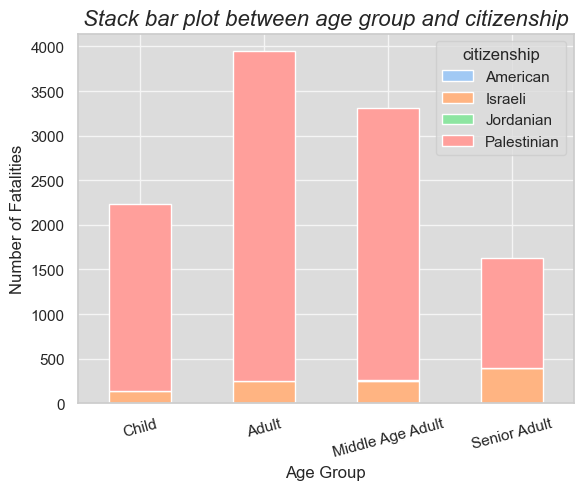

<Figure size 640x480 with 0 Axes>

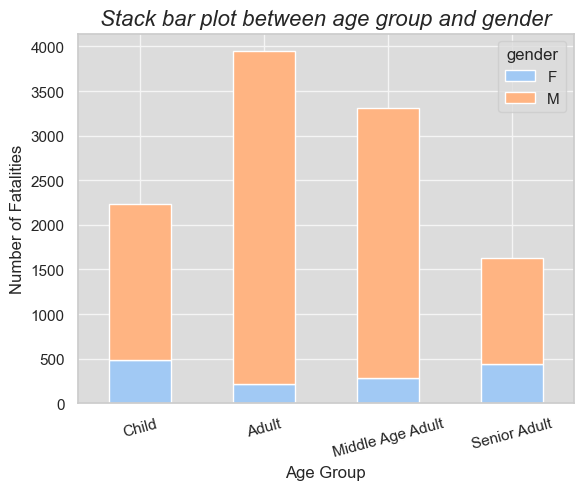

<Figure size 640x480 with 0 Axes>

In [26]:

age_value_counts_sotred = data['age'].value_counts().sort_index()

# Bar chart based on age groups
# Age groups based on age
child = age_value_counts_sotred.loc[0:19].sum()
adult = age_value_counts_sotred.loc[19:26].sum()
middleAgeAdult = age_value_counts_sotred.loc[26:41].sum()
seniorAdult = age_value_counts_sotred.loc[40:].sum()

plt.figure(figsize=(16, 7))
plt.bar(['Child', 'Adult', 'Middle Age Adult', 'Senior Adult'],
        [child, adult, middleAgeAdult, seniorAdult])
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatalities by Age Groups Bar Plot',fontsize=16,fontstyle='italic')
plt.show()

plt.clf()

# Pie chart based on gender
gender_value_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_value_counts, labels=gender_value_counts.index.map(lambda value: 'Male' if value=='M' else 'Female' if value=='F' else value), autopct='%.2f%%', startangle=140)
plt.title('Gender based fatalities Pie Chart',fontsize=16,fontstyle='italic')
plt.legend()
plt.show()

plt.clf()

# Bar plot based on citizendhip
citizenship_value_counts = data['citizenship'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(citizenship_value_counts.index, citizenship_value_counts.values)
plt.xlabel('CitizenShip', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatilities by citizenship Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

# Stacked plots
df = pd.DataFrame(data) # Copy data in df to avoid manipulation in real data
# Age bins and groups distribution
age_bins = [0, 18, 25, 40, 120]
age_labels = ['Child', 'Adult', "Middle Age Adult", 'Senior Adult']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Stack bar plot between age group and citizenship
pivot_df = df.pivot_table(index='age_group'
                          , columns='citizenship', values='age', aggfunc='count')
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Stack bar plot between age group and citizenship',fontsize=16,fontstyle='italic')
plt.xticks(rotation=15)
plt.show()

plt.clf()

# Stack bar plot between age group and gender
pivot_df = df.pivot_table(index='age_group'
                          , columns='gender', values='age', aggfunc='count')
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Stack bar plot between age group and gender',fontsize=16,fontstyle='italic')
plt.xticks(rotation=15)
plt.show()

plt.clf()

Q-3
# Bar plot based on top 5 citizenship value counts

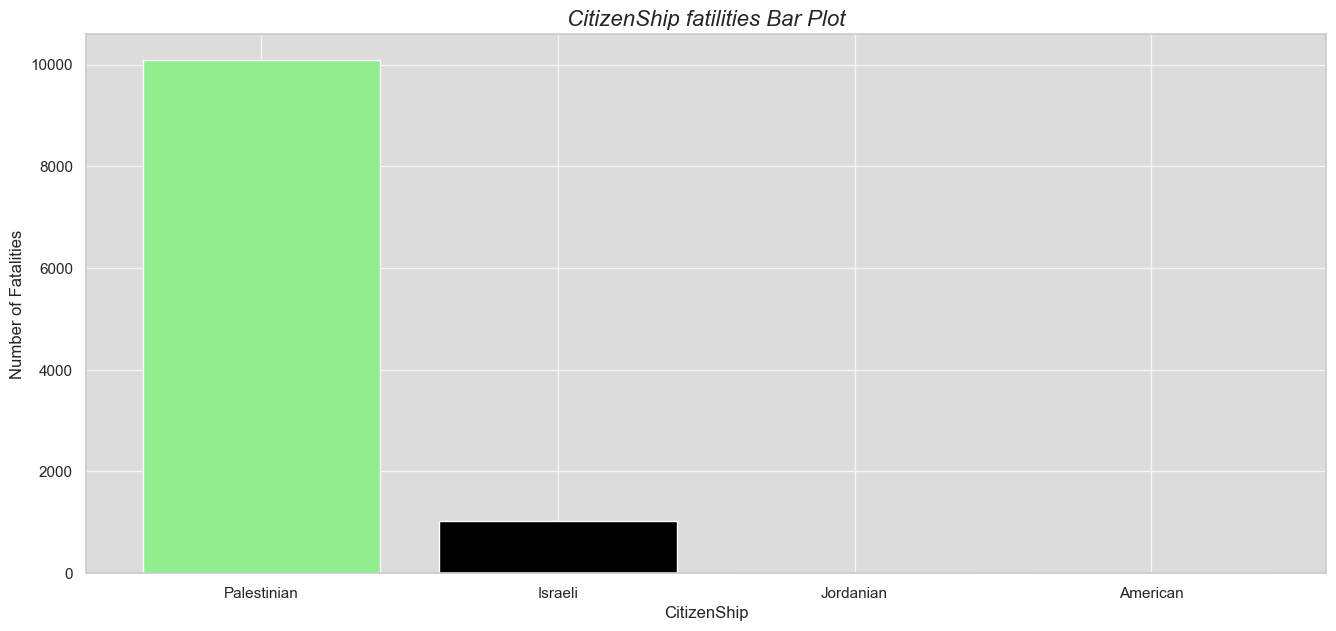

<Figure size 640x480 with 0 Axes>

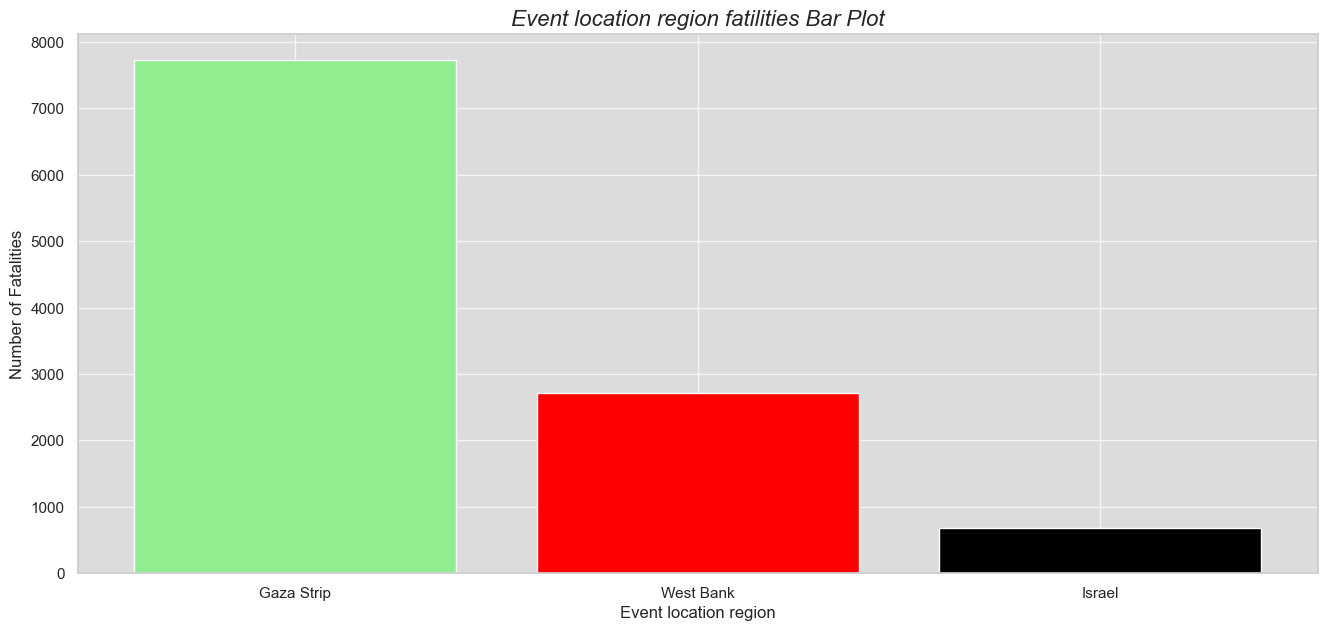

<Figure size 640x480 with 0 Axes>

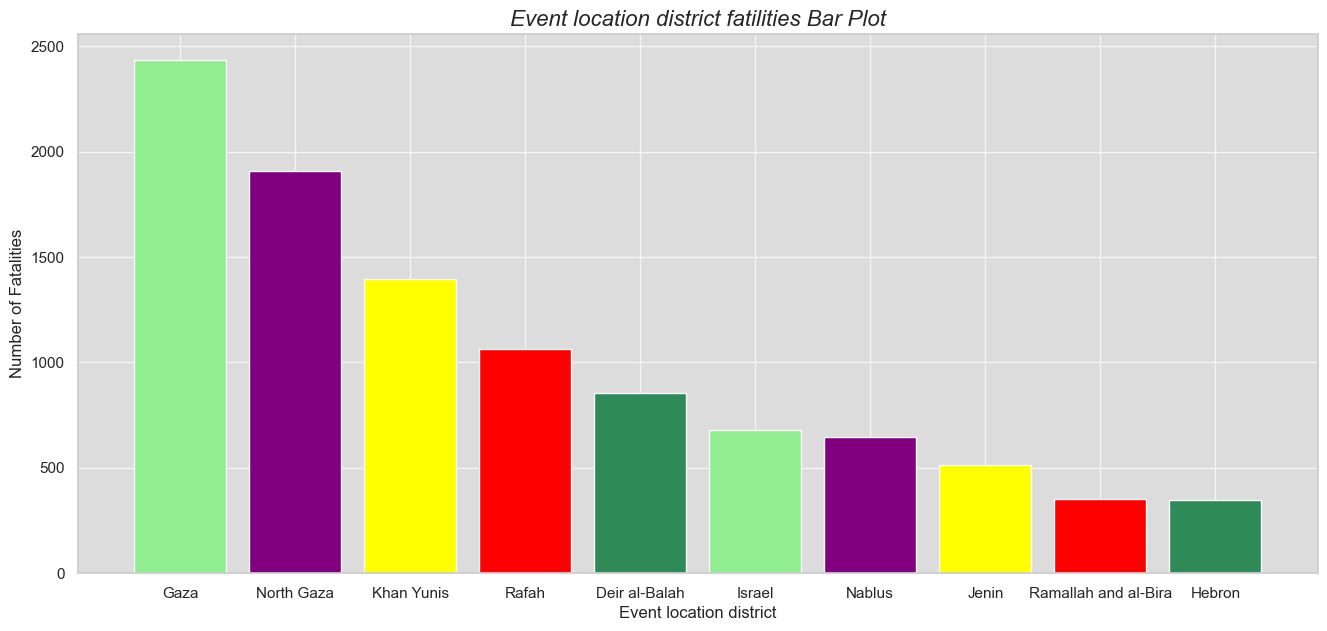

<Figure size 640x480 with 0 Axes>

In [27]:

citizenship_value_counts = data['citizenship'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(citizenship_value_counts.head(5).index, citizenship_value_counts.head(5).values, color=['lightgreen', 'black', 'yellow', 'red'])
plt.xlabel('CitizenShip',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('CitizenShip fatilities Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

plt.clf()

# Bar plot based on top 5 event location region value counts
event_location_region_value_counts = data['event_location_region'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(event_location_region_value_counts.head(5).index, event_location_region_value_counts.head(5).values, color=['lightgreen', 'red', 'black'])
plt.xlabel('Event location region',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Event location region fatilities Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

plt.clf()

# Bar plot based on top 10 event location district value counts
event_location_district_value_counts = data['event_location_district'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(event_location_district_value_counts.head(10).index, event_location_district_value_counts.head(10).values,
        color=['lightgreen', 'purple', 'yellow', 'red', 'seagreen'])
plt.xlabel('Event location district',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Event location district fatilities Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

plt.clf()

In [28]:
# !pip install wordcloud
from wordcloud import WordCloud

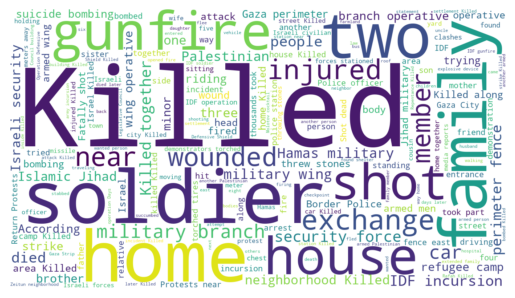

In [29]:
text = ''.join(df['notes'].dropna())
wordcloud = WordCloud(background_color='white', width=1366, height=768).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Q-4


# type_of_injury


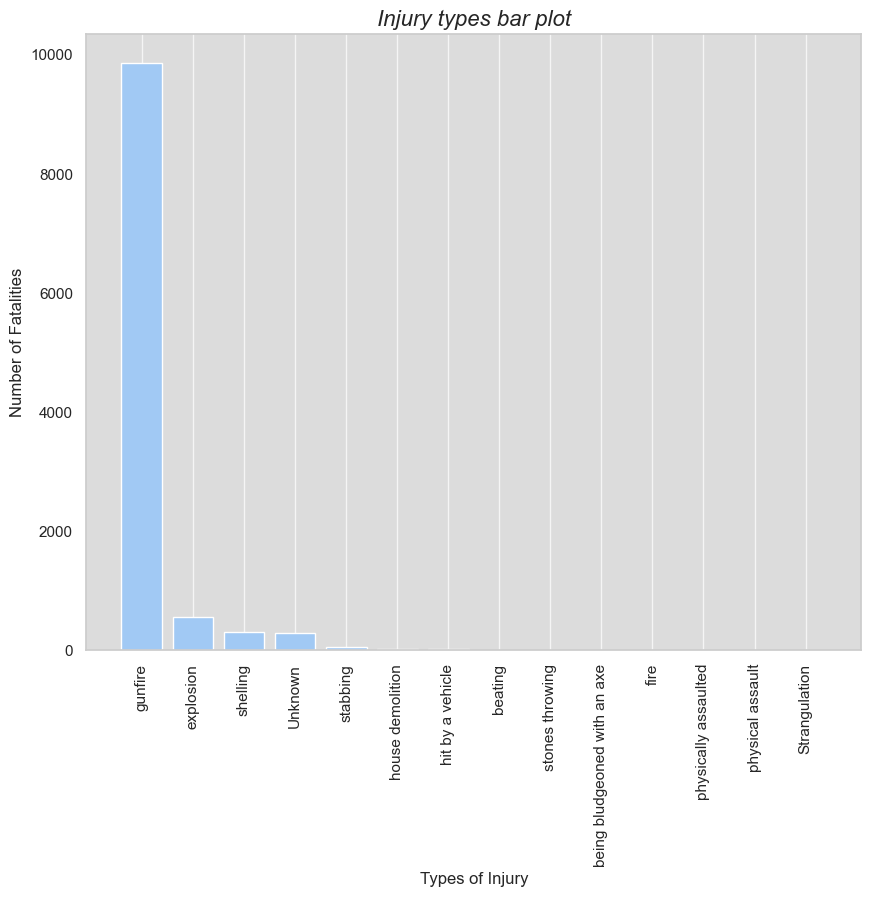

In [30]:

injury_types = data['type_of_injury']


injury_count = injury_types.value_counts()


plt.figure(figsize=(10, 8))
plt.bar(injury_count.index, injury_count.values)
plt.xlabel('Types of Injury',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Injury types bar plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


#Q-5


# ammunition_frequency  and means_of_killing_frequency

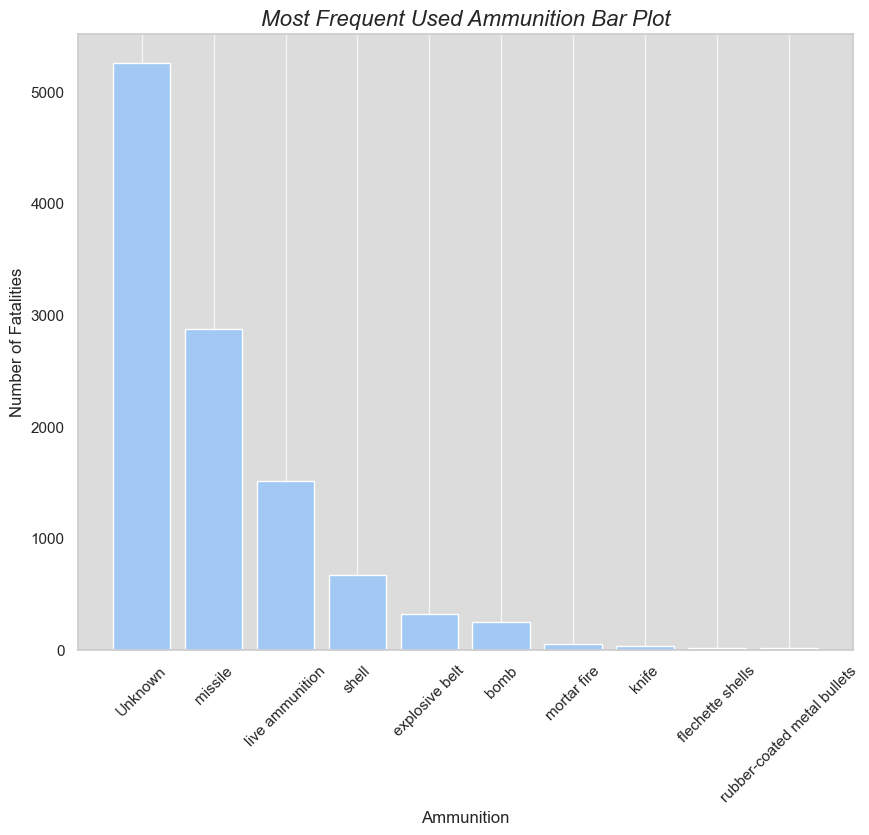

<Figure size 640x480 with 0 Axes>

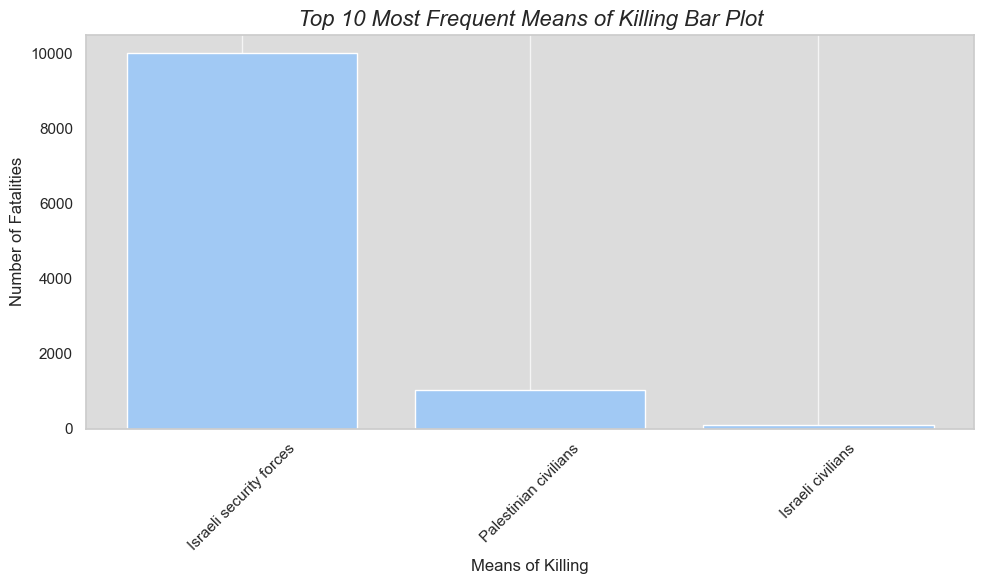

In [31]:

ammunition_frequency = data['ammunition'].value_counts()
means_of_killing_frequency = data['killed_by'].value_counts()


plt.figure(figsize=(10, 8))
plt.bar(ammunition_frequency.head(10).index, ammunition_frequency.head(10).values)
plt.xlabel('Ammunition',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Most Frequent Used Ammunition Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.clf()

plt.figure(figsize=(10, 6))
plt.bar(means_of_killing_frequency.head(10).index, means_of_killing_frequency.head(10).values)
plt.xlabel('Means of Killing',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Top 10 Most Frequent Means of Killing Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#Q-6

# victim_profiles

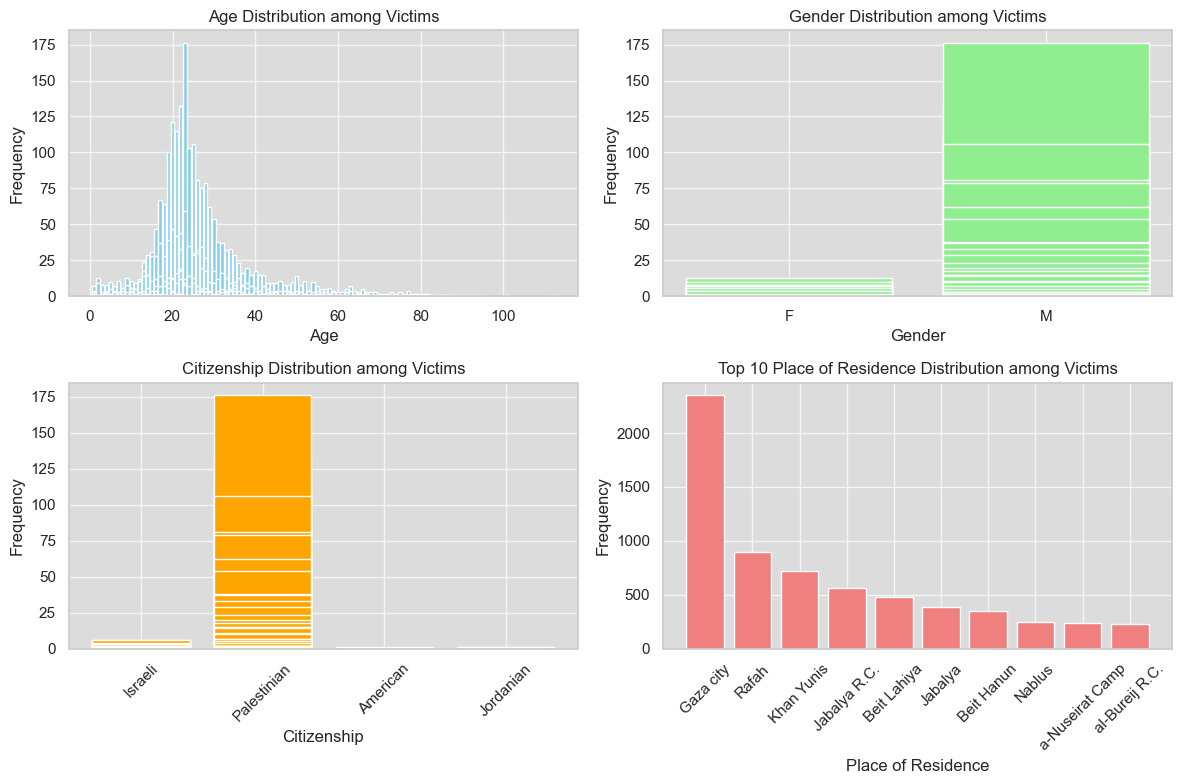

In [32]:

victim_profiles = data.groupby(['age', 'gender', 'citizenship', 'place_of_residence']).size().reset_index()
victim_profiles.columns = ['Age', 'Gender', 'Citizenship', 'Place of Residence', 'Frequency']


fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.bar(victim_profiles['Age'], victim_profiles['Frequency'], color='skyblue')
ax1.set_title('Age Distribution among Victims')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

ax2.bar(victim_profiles['Gender'], victim_profiles['Frequency'], color='lightgreen')
ax2.set_title('Gender Distribution among Victims')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Frequency')

ax3.bar(victim_profiles['Citizenship'], victim_profiles['Frequency'], color='orange')
ax3.set_title('Citizenship Distribution among Victims')
ax3.set_xlabel('Citizenship')
ax3.set_ylabel('Frequency')
ax3.tick_params(axis='x', rotation=45)



grouped_residence = victim_profiles.groupby('Place of Residence')['Frequency'].sum().reset_index()

# Selecting top 10 places based on frequency
top_10_residence = grouped_residence.nlargest(10, 'Frequency')
ax4.bar(top_10_residence['Place of Residence'], top_10_residence['Frequency'], color='lightcoral')
ax4.set_title('Top 10 Place of Residence Distribution among Victims')
ax4.set_xlabel('Place of Residence')
ax4.set_ylabel('Frequency')
ax4.tick_params(axis='x', rotation=45)
# ax,fig=plt.subplots()
# ax.set_facecolor('grey')
plt.tight_layout()

# sns.set(palette='pastel')
# sns.set_style('whitegrid', {"axes.facecolor": 'None', "grid.color": 'None'})
# plt.style.use('default')
plt.show()


